In [22]:
# import the required libraries

import seaborn as sns
import numpy as np # for data manipulation
from numpy import mean
from numpy import std
from numpy import nan
from numpy import isnan
import pandas as pd # for data manipulation
from pandas.plotting import scatter_matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 
from collections import Counter
from matplotlib import pyplot

In [23]:
# load dataset
df = pd.read_csv('Data.csv')
print(df.head())
#df = pd.read_csv('Data_without-TWOcolumns.csv')
#df = pd.read_csv('Data_without-72ROWS.csv')
print('Shape:', df.shape)# set input matrix and target column

   Floor_Num  Total_Floor_Area  Column_Area  Concrete_Wall_AreaNS  \
0        2.0            1797.0         6.21                   0.0   
1        1.0             577.0         2.00                   0.0   
2        3.0             498.0         1.50                   0.0   
3        2.0             310.0         1.40                   0.0   
4        3.0             287.0         0.74                   0.0   

   Concrete_Wall_AreaEW  Masonry_Wall_AreaNS  Masonry_Wall_AreaEW  \
0                   0.0                 0.00                 9.49   
1                   0.0                 0.00                 1.68   
2                   0.0                 1.35                 0.40   
3                   0.0                 1.02                 0.00   
4                   0.0                 3.74                 1.74   

   Captive_Columns  Damage_Class  
0                1             4  
1                0             2  
2                0             2  
3                0            

Class=4.0, Count=224, Percentage=42.59%
(526, 9)
Class=2.0, Count=161, Percentage=30.61%
(526, 9)
Class=3.0, Count=87, Percentage=16.54%
(526, 9)
Class=1.0, Count=54, Percentage=10.27%
(526, 9)
[4 2 3 1]
Damage_Class
1     54
2    161
3     87
4    224
dtype: int64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


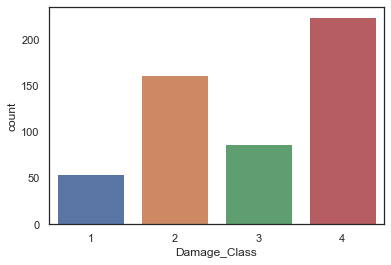

In [24]:
# summarize the class distribution
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%s, Percentage=%.2f%%' % (k, v, per))
    print(df.shape)
print(df['Damage_Class'].unique())
print(df.groupby('Damage_Class').size())
sns.countplot(df['Damage_Class'])
pyplot.show()

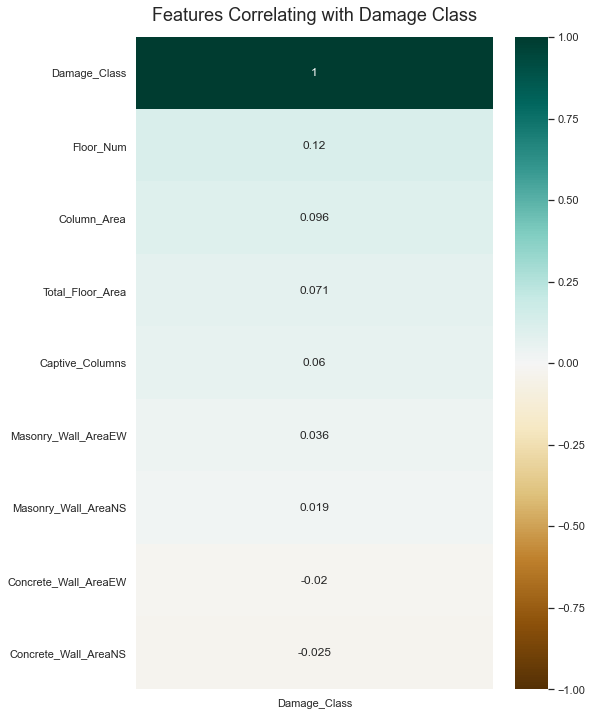

In [25]:
# Correlation of Independent Variables with the Dependent Variable
pyplot.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Damage_Class']].sort_values(by='Damage_Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Damage Class', fontdict={'fontsize':18}, pad=16);
pyplot.savefig('heatmap_damage.png', dpi=200, bbox_inches='tight')


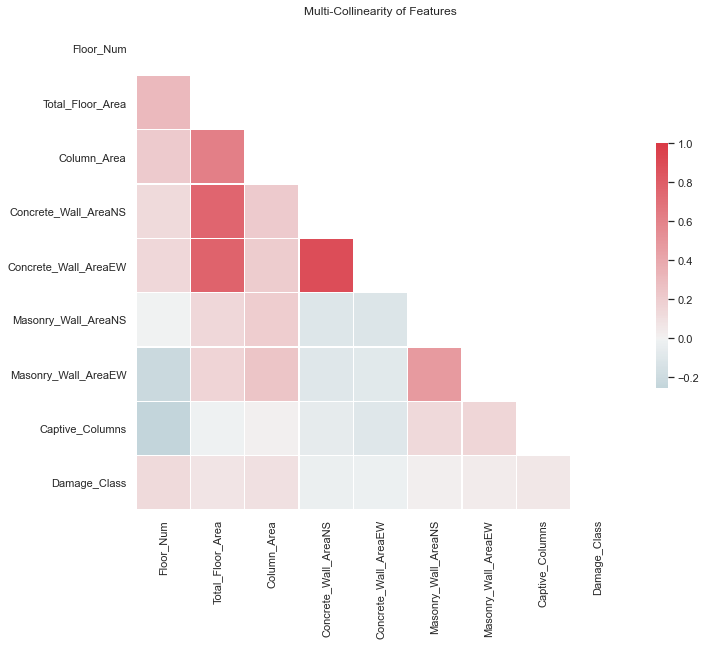

In [26]:
sns.set(style="white")
# Create a covariance matrix
corr = df.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = pyplot.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')
pyplot.savefig('correlation2.png')

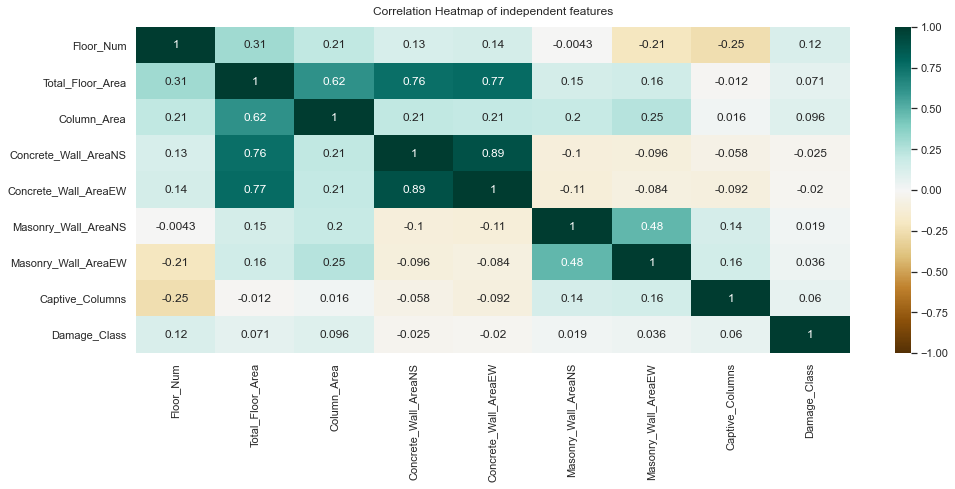

In [27]:
# Increase the size of the heatmap.
pyplot.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap of independent features', fontdict={'fontsize':12}, pad=12);

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
pyplot.savefig('heatmap.png', dpi=300, bbox_inches='tight')

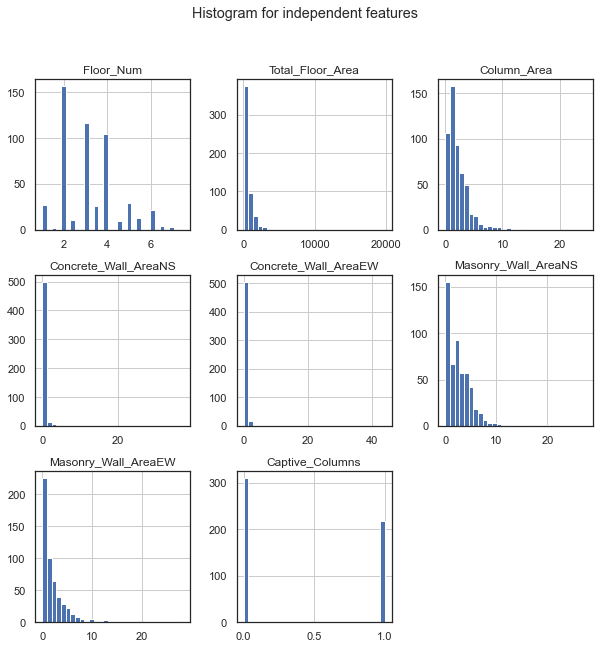

<Figure size 432x288 with 0 Axes>

In [28]:
# # create a histogram plot of each variable
import pylab as pl
df.drop('Damage_Class',axis=1).hist(bins=30, figsize=(10,10))
pl.suptitle("Histogram for independent features")
pyplot.savefig('Damage_hist')
pyplot.show()
pyplot.savefig('Hist_independent_feat.png', dpi=300, bbox_inches='tight')

In [29]:
# count the number of nan values in each column
print(df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Concrete_Wall_AreaNS', 'Concrete_Wall_AreaEW','Masonry_Wall_AreaNS', 'Masonry_Wall_AreaEW', 'Captive_Columns']].isnull().sum())

Floor_Num               0
Total_Floor_Area        0
Column_Area             3
Concrete_Wall_AreaNS    0
Concrete_Wall_AreaEW    0
Masonry_Wall_AreaNS     0
Masonry_Wall_AreaEW     0
Captive_Columns         0
dtype: int64


In [30]:
# count the number of missing values for each column
num_missing = (df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Concrete_Wall_AreaNS', 'Concrete_Wall_AreaEW','Masonry_Wall_AreaNS', 'Masonry_Wall_AreaEW', 'Captive_Columns']] == nan).sum()
# report the results
print(num_missing)

Floor_Num               0
Total_Floor_Area        0
Column_Area             0
Concrete_Wall_AreaNS    0
Concrete_Wall_AreaEW    0
Masonry_Wall_AreaNS     0
Masonry_Wall_AreaEW     0
Captive_Columns         0
dtype: int64


In [31]:
# retrieve the numpy array
values = df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Concrete_Wall_AreaNS', 'Concrete_Wall_AreaEW','Masonry_Wall_AreaNS', 'Masonry_Wall_AreaEW', 'Captive_Columns']].values

In [32]:
# define imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')

In [33]:
# transform the dataset
trans_values = imputer.fit_transform(values)

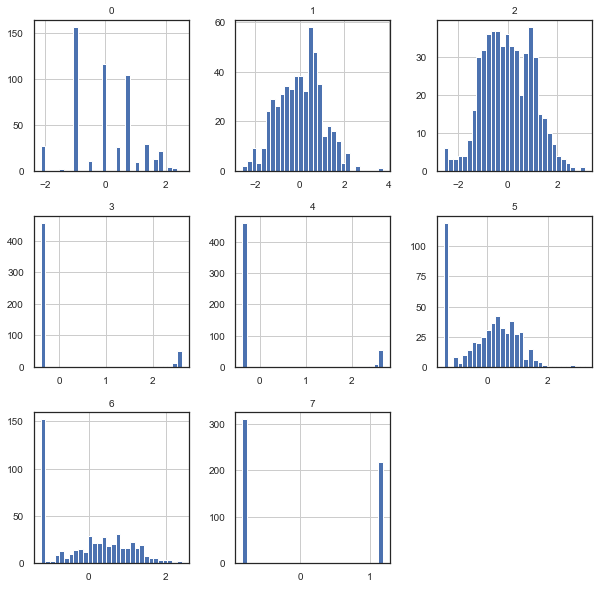

<Figure size 432x288 with 0 Axes>

In [34]:
# Making data more Gaussian
# power transform the raw data
from sklearn.preprocessing import PowerTransformer
data = trans_values[:,:]
# perform a box-cox transform of the dataset
from pandas import DataFrame
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method= 'yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(bins=30, figsize=(10,10), xlabelsize=10, ylabelsize=10)
[x.title.set_size(10) for x in fig.ravel()]
# show the plot
pyplot.savefig('Damage_gaussi_hist')
pyplot.show()
pyplot.savefig('Hist_gaussi_hist.png', dpi=300, bbox_inches='tight')

In [35]:
# split dataset into independent and dependent variables
# array = df.values
# print('Shape:', df.shape)# set input matrix and target column
X = dataset.values[:, :]
y = df.values[:, 8] # no changes for the dependent variable
print('Shape of df:', df.shape)
print('Shape of X:', X.shape)

Shape of df: (526, 9)
Shape of X: (526, 8)


In [36]:
# libraries for extracting important features out from the dataset
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
test = SelectKBest(score_func=f_classif, k=6)
fit = test.fit(X, y)

# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[10.124 10.22   6.377  0.376  0.305  0.353  3.026  2.771]


In [37]:
# summarize selected features
print(features[0:5,:])

[[-0.917  1.592  1.735 -0.394  1.736  1.193]
 [-2.145  0.296  0.25  -0.394  0.323 -0.838]
 [-0.01   0.113 -0.134 -0.394 -0.65  -0.838]
 [-0.917 -0.503 -0.224 -0.394 -1.256 -0.838]
 [-0.01  -0.608 -0.991 -0.394  0.352  1.193]]


Class=4, n=224 (25.000%)
Class=2, n=224 (25.000%)
Class=3, n=224 (25.000%)
Class=1, n=224 (25.000%)


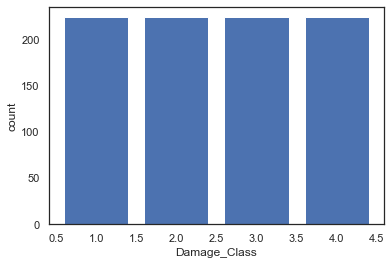

In [38]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.xlabel('Damage_Class')
pyplot.ylabel('count')
pyplot.show()

In [39]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [40]:
# Feature Scaling
# First we are Standardizing the data to have a standard normal distribution
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# then we are normalizing the data in order to get all the positive value
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [42]:
# encoding the dependent variable
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)